In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (24,16)
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터

In [50]:
seoul = pd.read_csv("서울시_데이터종합_수정.csv")

In [51]:
seoul

,대여소번호,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
0,502.0,0.00,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640,258.605479
1,207.0,0.00,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445,250.934247
2,3533.0,0.00,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995,135.227397
3,1210.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,324.671476,2761.514679,145.087355,70.406036,0.333333,24052,348.694407,133.017808
4,1308.0,39658.62,27219.63,552.09,0.0,3227.37,0.0,8097.88,0.00,332.366534,749.646476,408.450803,12.103377,1.250000,41364,1258.678353,117.180822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,664.0,61560.86,0.00,7622.29,0.0,0.00,0.0,0.00,0.00,332.212513,88.481654,592.515746,370.864704,2.000000,8727,0.000000,7.950860
1478,2287.0,0.00,3830.38,0.00,0.0,0.00,0.0,4749.01,0.00,187.100314,5396.477786,3469.661173,272.330166,7.444444,8164,749.655227,0.664384
1479,2391.0,0.00,0.00,0.00,0.0,0.00,0.0,3456.00,0.00,366.727904,4119.802431,1206.457463,144.812218,4.500000,14769,345.607938,0.583562
1480,465.0,0.00,6864.08,0.00,0.0,0.00,0.0,527.37,0.00,377.608155,301.960064,1245.792726,167.833245,6.250000,1224,424.978106,3.122850


In [52]:
seoul.set_index(['대여소번호'], inplace=True)

## 로그변환

In [53]:
from scipy.stats import skew

features_index = seoul.dtypes[seoul.dtypes != 'object'].index
skew_features = seoul[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

문화시설_sum        17.913397
숙박시설_sum        11.841145
의료시설_sum        10.670393
판매시설_sum         9.106897
근린생활시설_sum       8.937168
주거시설_sum         7.143945
교육시설_sum         4.636081
업무시설_sum         4.076714
지하철_distance     2.959794
일별대여평균이용량        2.951318
공원_distance      2.918526
버스_distance      2.488875
경사도_mean         1.710297
dtype: float64


In [54]:
seoul_log = seoul.copy()

In [55]:
seoul_log[skew_features_top.index] = np.log1p(seoul[skew_features_top.index])
seoul_log

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
대여소번호,,,,,,,,,,,,,,,,
502.0,0.000000,0.000000,0.000000,0.0,6.810804,0.0,11.831935,0.000000,4.930944,1430.131460,4.040821,4.097812,0.405465,24085,714.440640,5.559163
207.0,0.000000,5.092092,0.000000,0.0,0.000000,0.0,11.039396,0.000000,5.351727,2254.225628,4.290482,3.473748,0.693147,15710,356.416445,5.529168
3533.0,0.000000,8.659472,8.454994,0.0,0.000000,0.0,7.050461,11.412336,5.092176,639.201940,5.175335,3.781491,0.000000,43626,549.726995,4.914326
1210.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,5.785889,2761.514679,4.984205,4.268382,0.287682,24052,348.694407,4.897973
1308.0,10.588089,10.211730,6.315521,0.0,8.079733,0.0,8.999481,0.000000,5.809243,749.646476,6.014817,2.572870,0.810930,41364,1258.678353,4.772216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.0,11.027798,0.000000,8.938963,0.0,0.000000,0.0,0.000000,0.000000,5.808780,88.481654,6.386064,5.918530,1.098612,8727,0.000000,2.191750
2287.0,0.000000,8.250980,0.000000,0.0,0.000000,0.0,8.465902,0.000000,5.236975,5396.477786,8.152100,5.610680,2.133509,8164,749.655227,0.509455
2391.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8.148156,0.000000,5.907343,4119.802431,7.096272,4.982320,1.704748,14769,345.607938,0.459677


## MinMaxScaler

In [56]:
y_target = seoul_log['일별대여평균이용량']
X_features = seoul_log.drop('일별대여평균이용량', axis=1, inplace=False)

In [57]:
y_target

대여소번호
502.0     5.559163
207.0     5.529168
3533.0    4.914326
1210.0    4.897973
1308.0    4.772216
            ...   
664.0     2.191750
2287.0    0.509455
2391.0    0.459677
465.0     1.416545
3543.0    2.153714
Name: 일별대여평균이용량, Length: 1482, dtype: float64

In [58]:
y_target_scaled = y_target.copy()
X_features_scaled = X_features.copy()

In [59]:
from sklearn.preprocessing import MinMaxScaler

#원래 값을 구하기 위해?
scaler_x = MinMaxScaler()
X_features_scaled = scaler_x.fit_transform(X_features)

scaler_y = MinMaxScaler()
y_target_scaled = scaler_y.fit_transform(y_target.values.reshape(-1,1))

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target_scaled, test_size=0.2, random_state=156)

In [61]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regr(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    print('MSE 값: {0:.3f}, RMSE 값: {1:.3f}, MAE 값: {2:.3f}, R2 값: {3:.3f}'.format(mse,rmse,mae,r2))

# Modeling

## LR

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

evaluate_regr(y_test, pred_lr)

MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.371


In [63]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

evaluate_regr(y_test, pred_ridge)

MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.370


In [64]:
lasso = Lasso()
lasso.fit(X_train, y_train)
pred_lasso= lasso.predict(X_test)

evaluate_regr(y_test, pred_lasso)

MSE 값: 0.021, RMSE 값: 0.145, MAE 값: 0.114, R2 값: -0.001


## RF

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs= -1,random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

evaluate_regr(y_test, pred_rf)

MSE 값: 0.012, RMSE 값: 0.112, MAE 값: 0.089, R2 값: 0.405


## XGB

In [23]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

evaluate_regr(y_test, pred_xgb)

MSE 값: 0.013, RMSE 값: 0.112, MAE 값: 0.090, R2 값: 0.404


## LGBM

In [24]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)

evaluate_regr(y_test, pred_lgbm)

MSE 값: 0.013, RMSE 값: 0.114, MAE 값: 0.091, R2 값: 0.385


## GBM

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)

evaluate_regr(y_test, pred_gbm)

MSE 값: 0.012, RMSE 값: 0.111, MAE 값: 0.090, R2 값: 0.411


# Parameter

In [68]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값:{1}, 최적 parameter:{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))

## RF

rf_params = {'n_jobs': [-1],
             'random_state':[0],
             'max_depth': [6,8,10,12], 
             'max_features': [5,10,15], 
             'min_samples_leaf' : [8, 10, 12], 
             'min_samples_split': [8, 16, 20], 
             'n_estimators': [100, 200, 300, 1000]}
best_rf = print_best_params(rf, rf_params)

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_cv = RandomForestRegressor(n_jobs= -1,random_state=0,max_depth=12,max_features=10,min_samples_leaf=8,min_samples_split=16,n_estimators=1000)
rf_cv.fit(X_train, y_train)
pred_rf_cv = rf_cv.predict(X_test)

evaluate_regr(y_test, pred_rf_cv)

MSE 값: 0.012, RMSE 값: 0.112, MAE 값: 0.089, R2 값: 0.408


## XGB

In [59]:
xgb_params = {'learning_rate': [0.1,0.2,0.3],
             'early_stopping_rounds':[50],
             'max_depth': [3,4,5], 
             'num_leaves': [3,7,15,31],
             'n_estimators': [100, 200, 300, 1000]}
best_xgb = print_best_params(xgb, xgb_params)

XGBRegressor 5 CV시 최적 평균 RMSE 값:0.74, 최적 parameter:{'early_stopping_rounds': 50, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 3}


In [27]:
from sklearn.ensemble import RandomForestRegressor

xgb_cv = XGBRegressor(objective='reg:squarederror', learning_rate=0.2, early_stopping_rounds=50, max_depth=3 ,num_leaves=3, n_estimators=100)
xgb_cv.fit(X_train, y_train)
pred_xgb_cv = xgb_cv.predict(X_test)

evaluate_regr(y_test, pred_xgb_cv)

MSE 값: 0.013, RMSE 값: 0.113, MAE 값: 0.092, R2 값: 0.394


# feature importance

## RF/XGB/LGBM/GBM

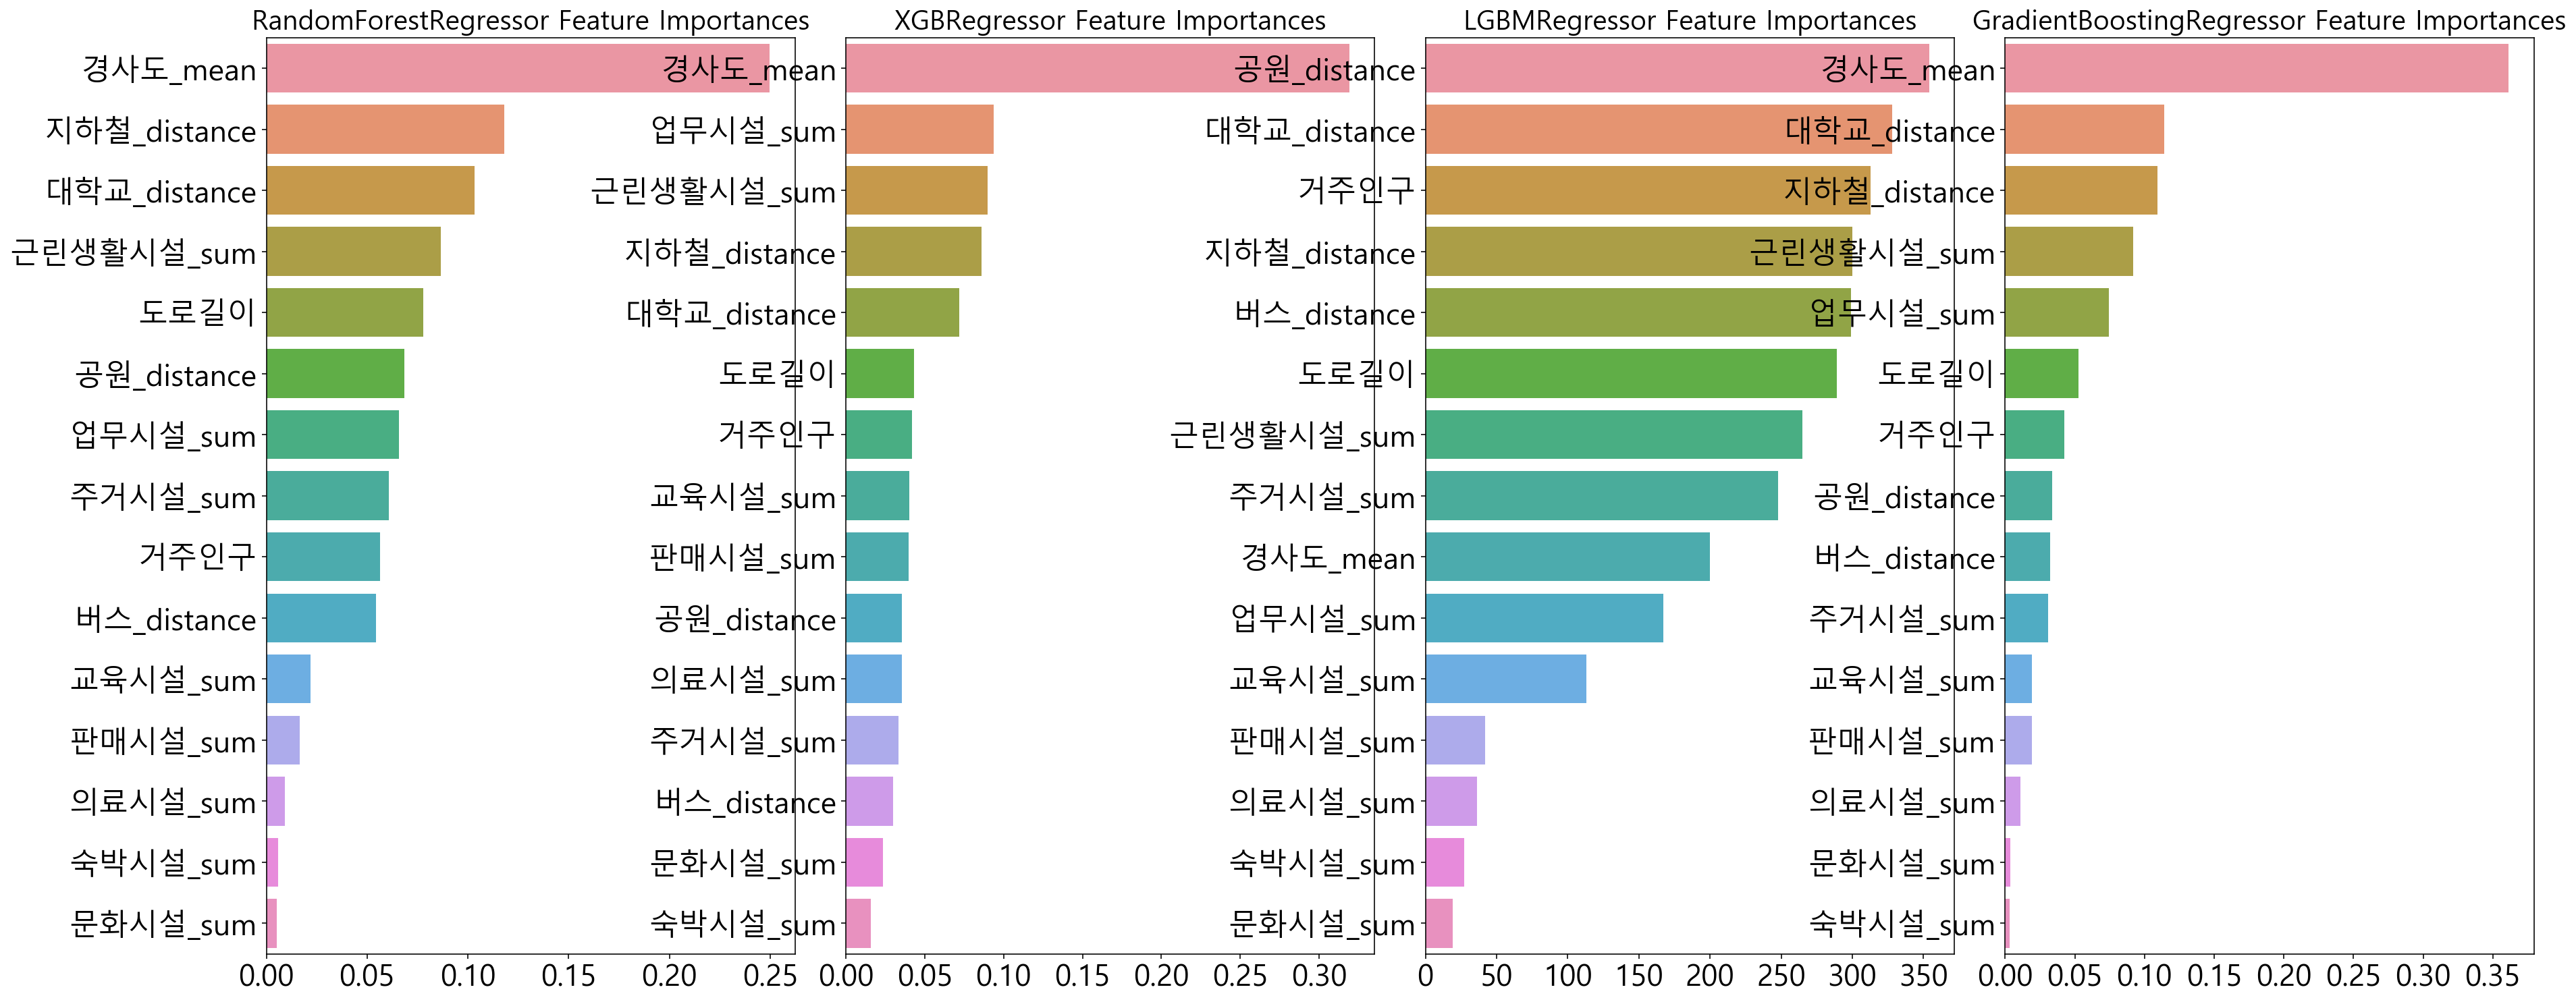

In [55]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=4)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=20)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화   
models = [rf,xgb,lgbm,gbm]
visualize_ftr_importances(models)

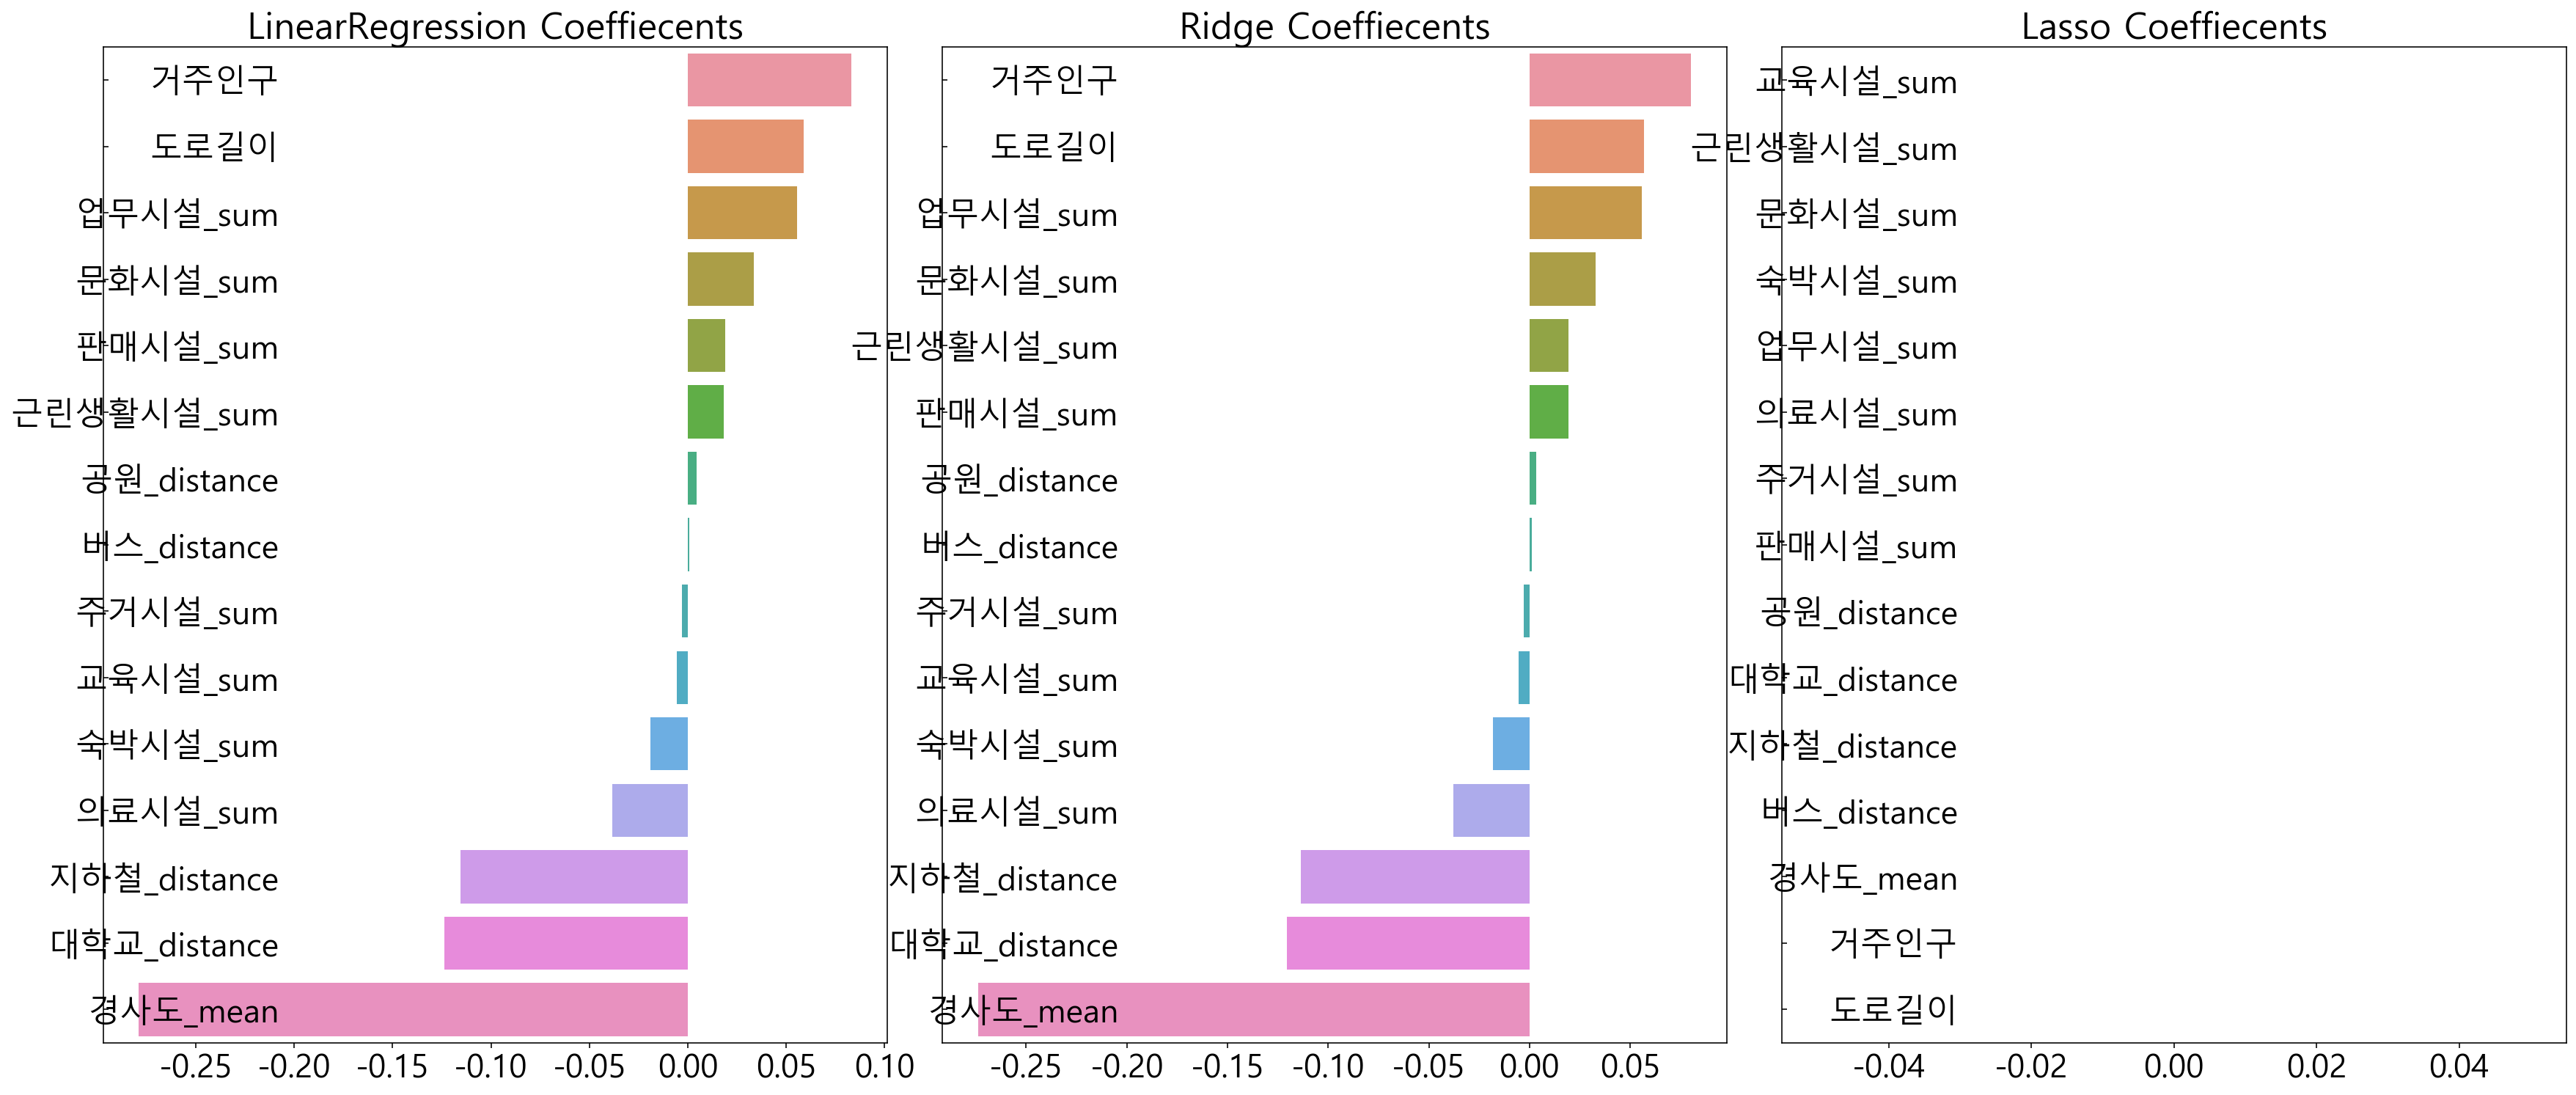

In [95]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(data = model.coef_.flatten(), index = X_features.columns )
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(15)
    coef_low = coef.sort_values(ascending=False).tail(15)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr, ridge, lasso]
visualize_coefficient(models)

# 예측값 비교

## GBM

In [74]:
y_test = scaler_y.inverse_transform(np.array(y_test).reshape(-1,1))
y_test = np.expm1(y_test)

pred_gbm= scaler_y.inverse_transform(np.array(pred_gbm).reshape(-1,1))
pred_gbm = np.expm1(pred_gbm)

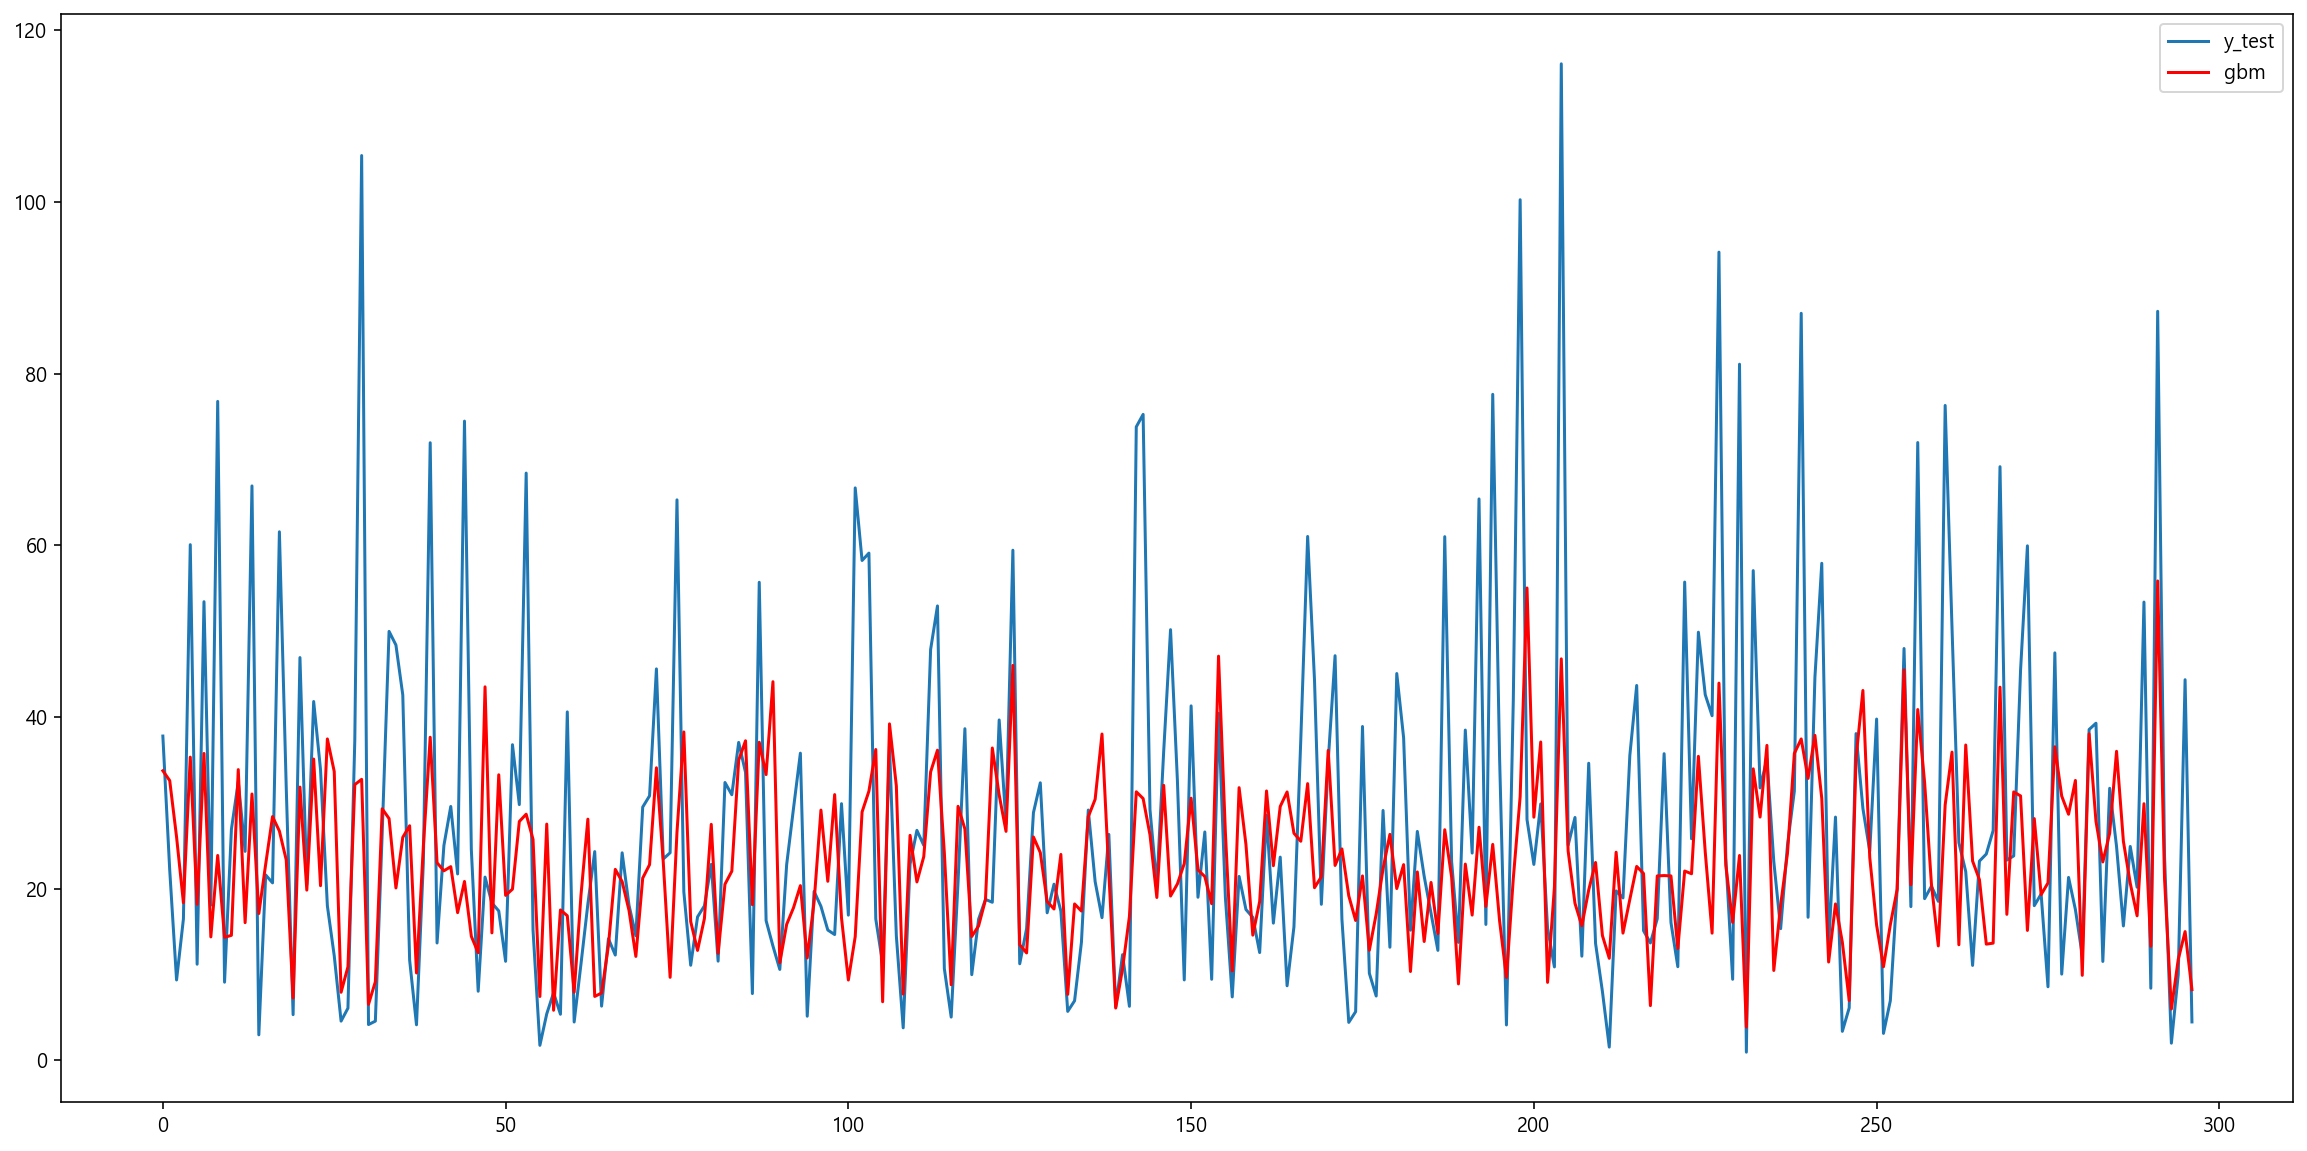

In [44]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='y_test')
plt.plot(pred_gbm, 'r', label='gbm')
plt.legend()
plt.show()

## LGBM

In [39]:
pred_lgbm= scaler_y.inverse_transform(np.array(pred_lgbm).reshape(-1,1))
pred_lgbm = np.expm1(pred_lgbm)

## LR

In [71]:
pred_lr= scaler_y.inverse_transform(np.array(pred_lr).reshape(-1,1))
pred_lr = np.expm1(pred_lr)

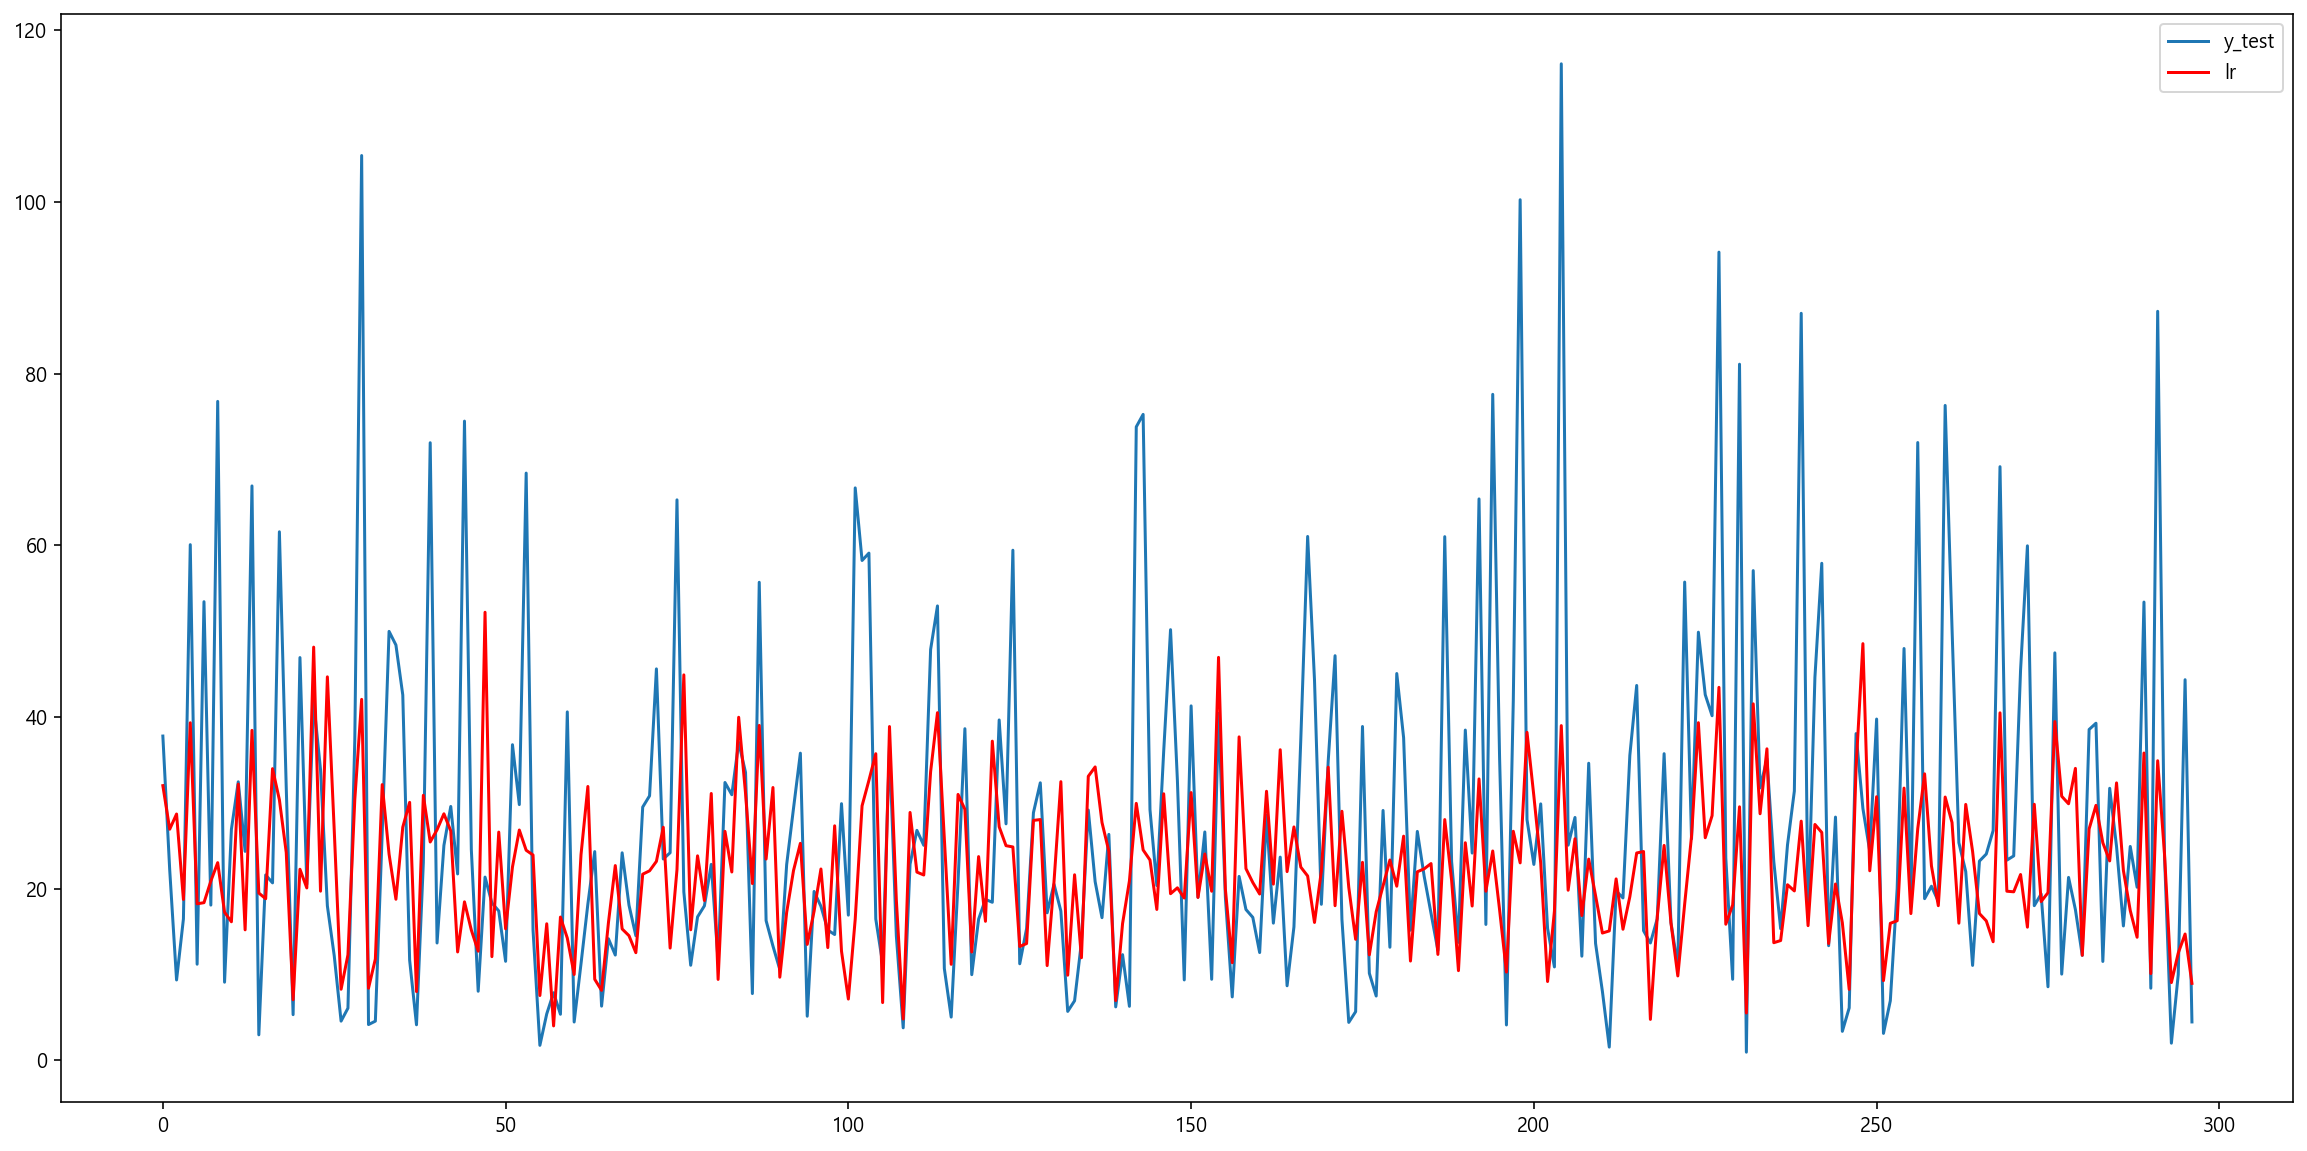

In [75]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='y_test')
plt.plot(pred_lr, 'r', label='lr')
plt.legend()
plt.show()

## RF

In [42]:
pred_rf= scaler_y.inverse_transform(np.array(pred_rf).reshape(-1,1))
pred_rf = np.expm1(pred_rf)

In [43]:
pred_rf_cv= scaler_y.inverse_transform(np.array(pred_rf_cv).reshape(-1,1))
pred_rf_cv = np.expm1(pred_rf_cv)

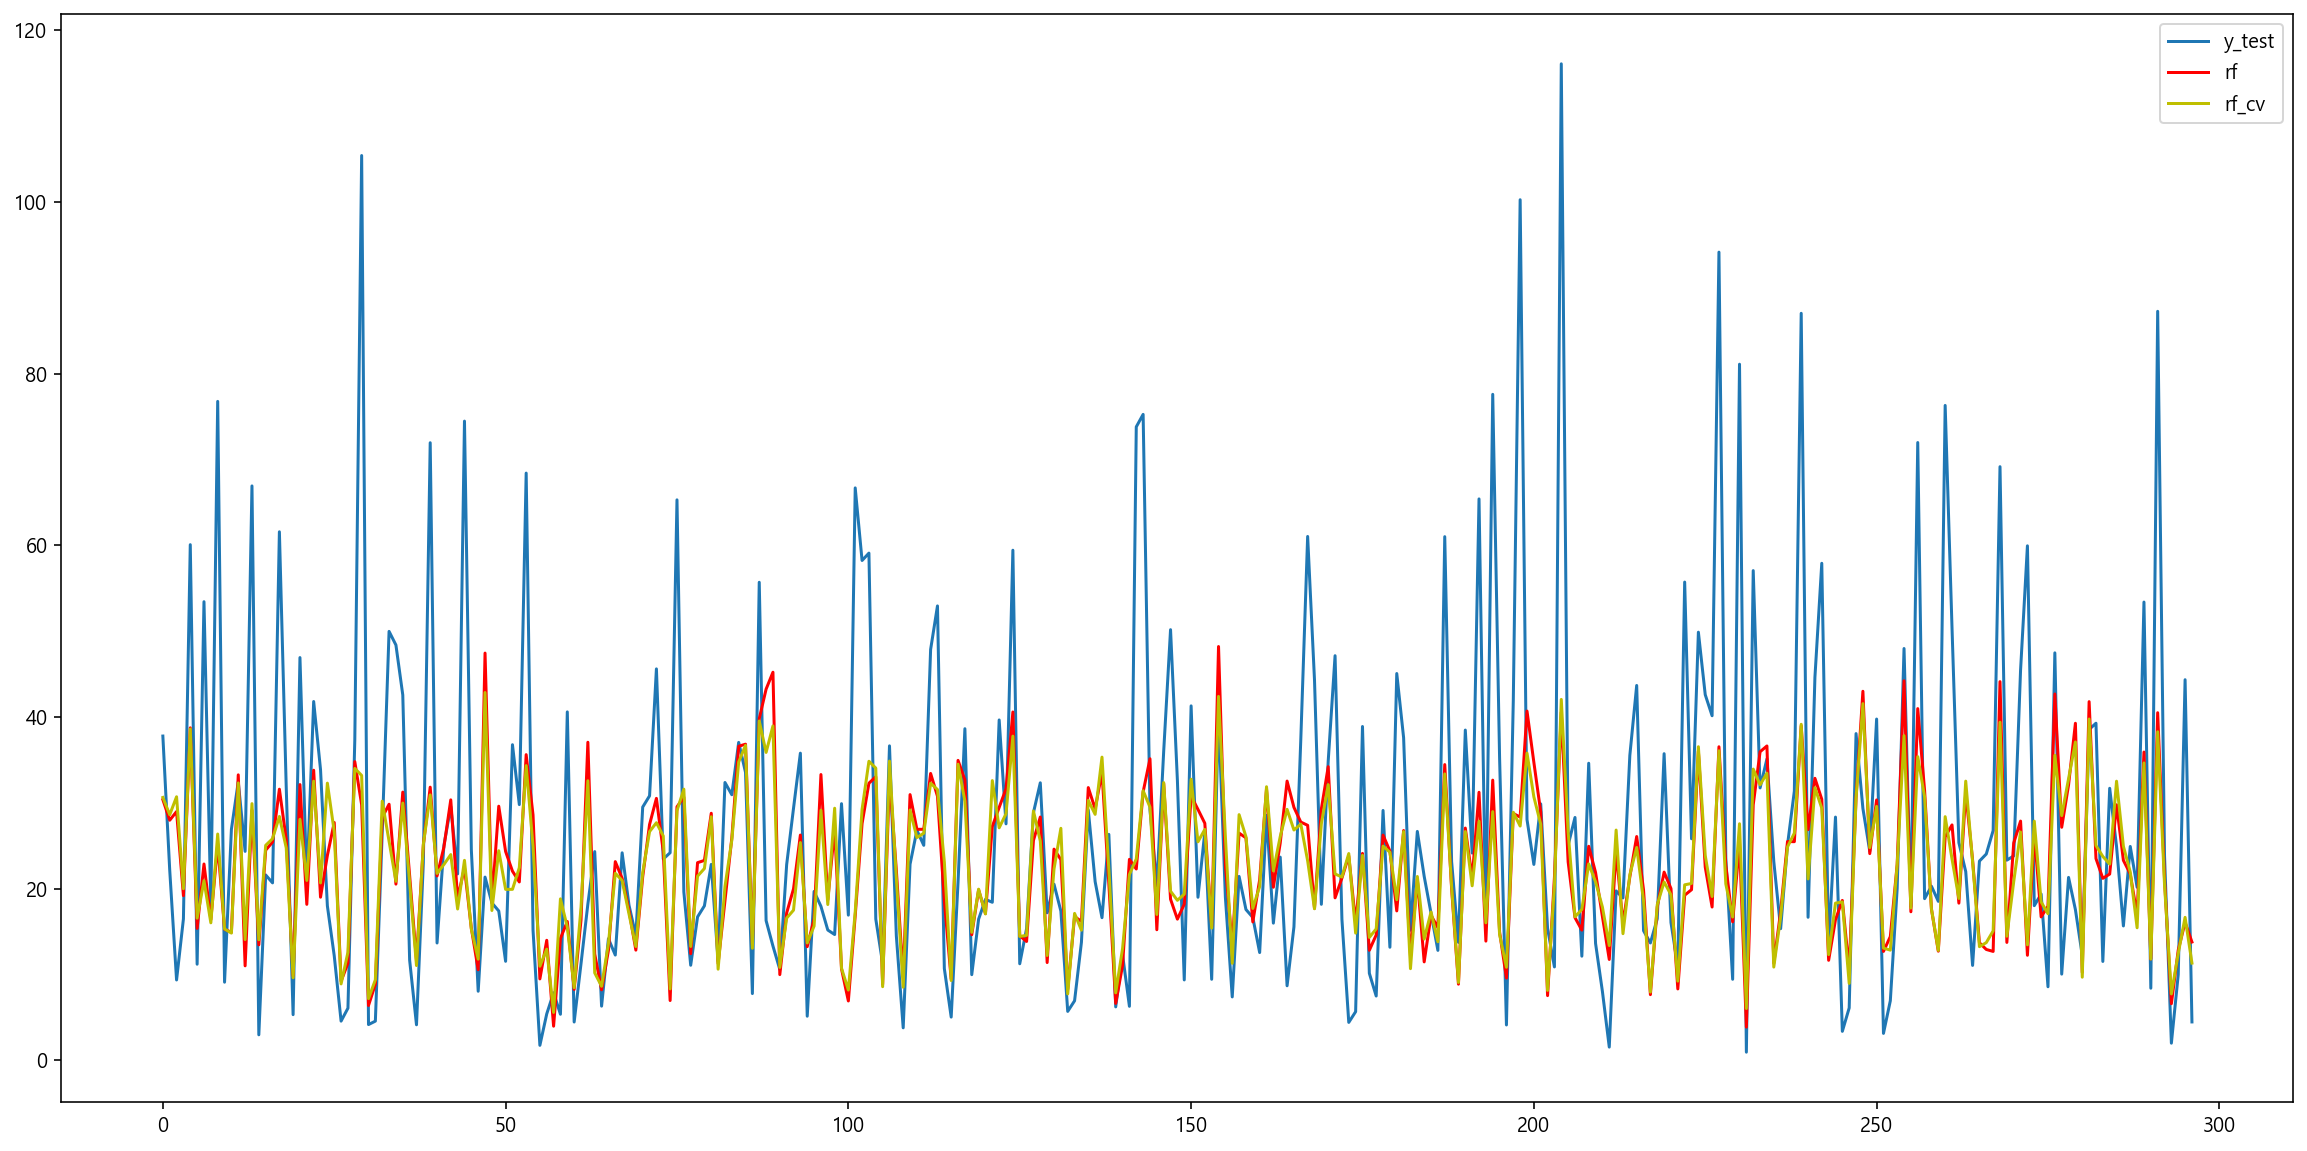

In [47]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='y_test')
plt.plot(pred_rf, 'r', label='rf')
plt.plot(pred_rf_cv, 'y', label='rf_cv')
plt.legend()
plt.show()